In [100]:
import pandas as pd
import numpy as np
import os
import math
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [4]:
path = "data"
dataList = []
for file in os.listdir(path):
    filepath = os.path.join(path,file)
    if filepath.endswith('.csv'):
        dataList.append(filepath)

In [5]:
for filepath in dataList:
    print(filepath)

data\day_1.csv
data\day_10.csv
data\day_100.csv
data\day_101.csv
data\day_102.csv
data\day_103.csv
data\day_104.csv
data\day_105.csv
data\day_106.csv
data\day_107.csv
data\day_108.csv
data\day_109.csv
data\day_11.csv
data\day_110.csv
data\day_111.csv
data\day_112.csv
data\day_113.csv
data\day_114.csv
data\day_115.csv
data\day_116.csv
data\day_117.csv
data\day_118.csv
data\day_119.csv
data\day_12.csv
data\day_120.csv
data\day_121.csv
data\day_122.csv
data\day_123.csv
data\day_124.csv
data\day_125.csv
data\day_126.csv
data\day_127.csv
data\day_128.csv
data\day_129.csv
data\day_13.csv
data\day_130.csv
data\day_131.csv
data\day_132.csv
data\day_133.csv
data\day_134.csv
data\day_135.csv
data\day_136.csv
data\day_137.csv
data\day_138.csv
data\day_139.csv
data\day_14.csv
data\day_140.csv
data\day_141.csv
data\day_142.csv
data\day_143.csv
data\day_144.csv
data\day_145.csv
data\day_146.csv
data\day_147.csv
data\day_148.csv
data\day_149.csv
data\day_15.csv
data\day_150.csv
data\day_151.csv
data\

In [6]:
def getday(x):
    a = 0
    for c in x:
        if c.isdigit():
            a = 10*a + int(c)
    return a

In [116]:
dataList = sorted(dataList, key = getday)
data = pd.DataFrame()
for filepath in dataList:
    currData = pd.read_csv(filepath)
    currData['Day'] = getday(filepath)
    if len(data)==0:
        data = currData
    else:
        data = pd.concat([data, currData])

data['returns'] = (data.price.shift(-1) - data.price)/data.price
data['Xreturn'] = (data.x.shift(-1) - data.x)/data.x

data = data[((data.Xreturn > data.Xreturn.quantile(0.02)) & (data.Xreturn < data.Xreturn.quantile(0.98)))]
data = data[((data.returns > data.returns.quantile(0.01)) & (data.returns < data.returns.quantile(0.99)))]

data = data.reset_index(drop = True)
data

,time,price,x,Day,returns,Xreturn
0,2,60373.000000,-0.977009,1,-0.000066,-0.027618
1,14,60356.500000,-0.103604,1,-0.000006,0.047384
2,21,60364.333333,0.336410,1,-0.000033,0.028565
3,22,60362.333333,0.346019,1,-0.000028,0.032299
4,23,60360.666667,0.357195,1,0.000014,0.015420
...,...,...,...,...,...,...
4551753,22394,69387.500000,-0.296101,216,-0.000005,0.003470
4551754,22395,69387.166667,-0.297128,216,0.000010,-0.005074
4551755,22396,69387.833333,-0.295621,216,-0.000005,0.002786
4551756,22397,69387.500000,-0.296444,216,-0.000002,-0.003166


In [10]:
data.describe()

,time,price,x,Day,returns
count,4.838184e+06,4.838176e+06,4.838184e+06,4.838184e+06,4.838173e+06
mean,1.120000e+04,6.780223e+04,-1.312087e-01,1.085000e+02,6.460898e-06
std,6.466035e+03,1.350469e+04,4.758086e-01,6.235317e+01,6.512779e-03
min,1.000000e+00,1.075680e+04,-1.000000e+00,1.000000e+00,-8.629822e-01
25%,5.600000e+03,6.487933e+04,-5.131146e-01,5.475000e+01,-1.791885e-05
50%,1.120000e+04,6.929267e+04,-1.399660e-01,1.085000e+02,0.000000e+00
75%,1.680000e+04,7.437050e+04,2.333192e-01,1.622500e+02,1.787392e-05
max,2.239900e+04,8.879600e+04,9.986330e-01,2.160000e+02,6.890047e+00


In [11]:
std = data.returns.std()
mean = data.returns.mean()
print("mean of returns,", "std of returns")
print(mean, std)

mean of returns, std of returns
6.460897954808064e-06 0.006512779484342522


[]

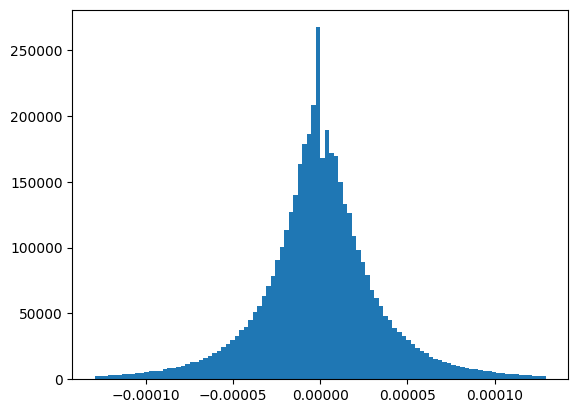

In [77]:
plt.hist(data.returns,bins=100)
plt.plot()

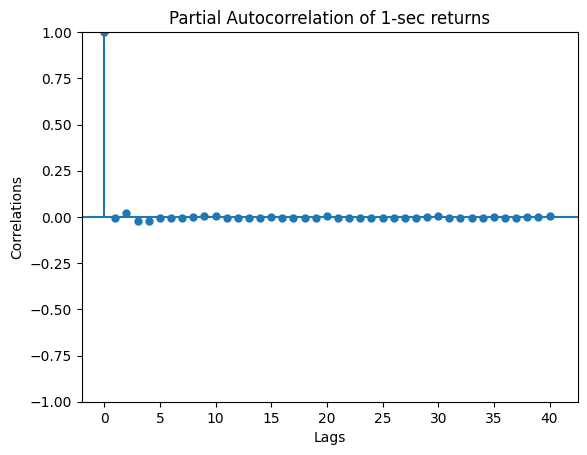

In [12]:
plot_pacf(data.returns, lags=40)
plt.title("Partial Autocorrelation of 1-sec returns")
plt.xlabel("Lags")
plt.ylabel("Correlations")
plt.show()

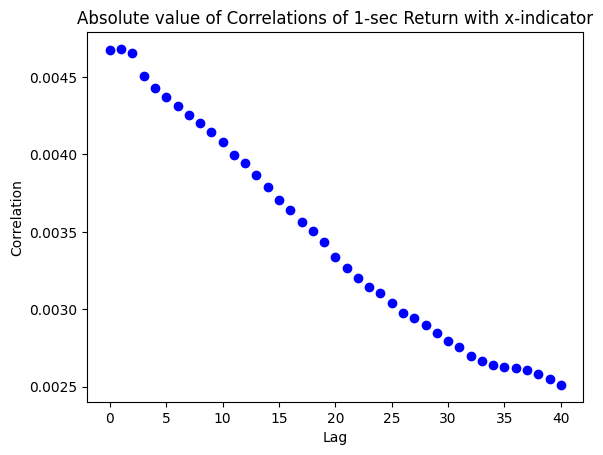

In [13]:
correlations = [data.x.shift(i).corr(data.returns) for i in range(41)]

plt.scatter(range(0,41), [abs(corr) for corr in correlations], marker = 'o', linestyle = '-', color = 'b')
plt.title("Absolute value of Correlations of 1-sec Return with x-indicator")
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

## Do the same for returns of period ranging from 1 to 10 sececonds

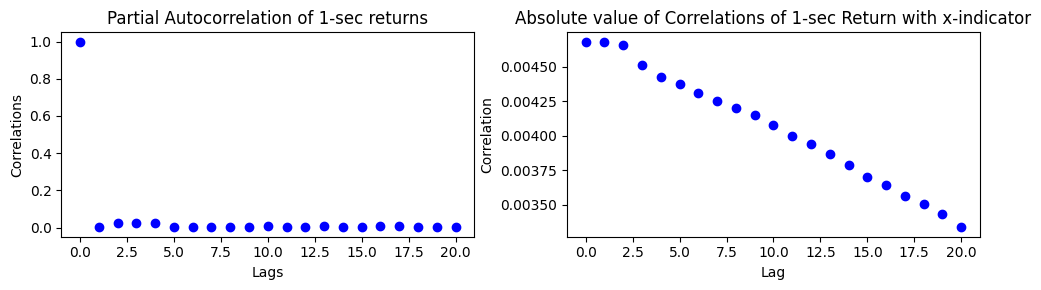

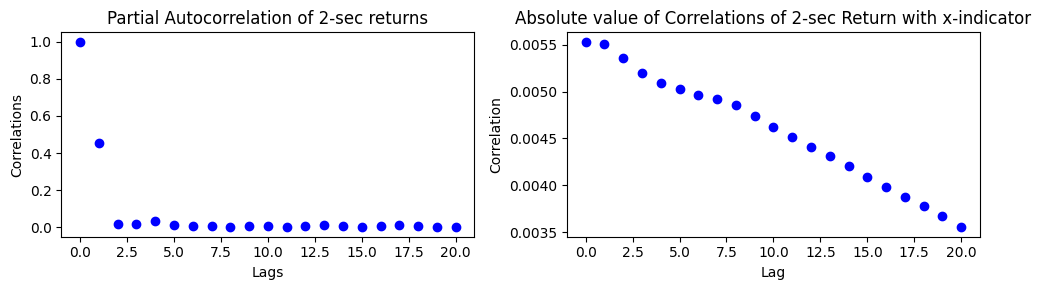

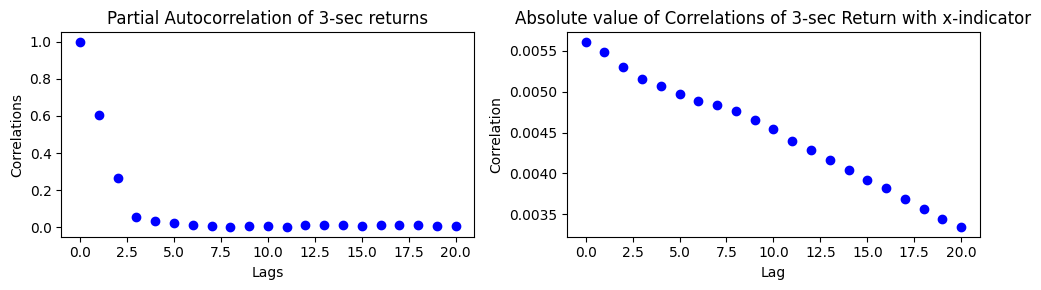

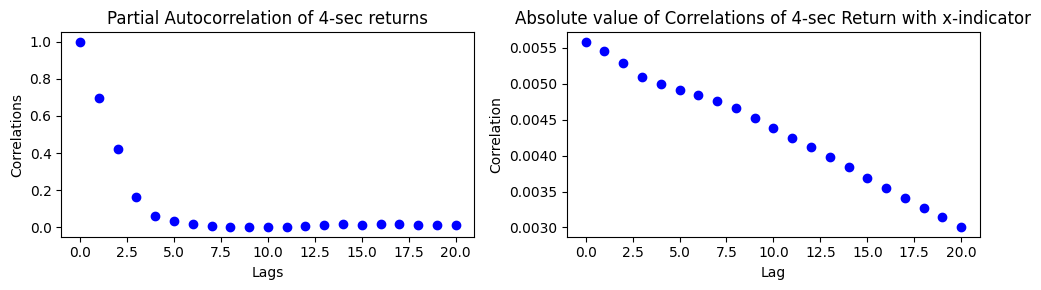

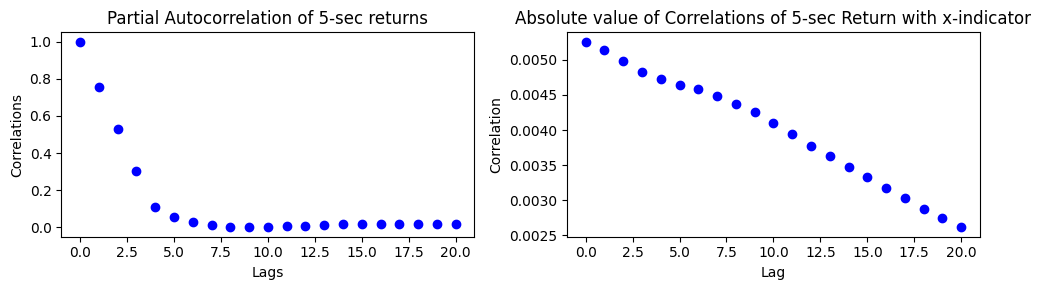

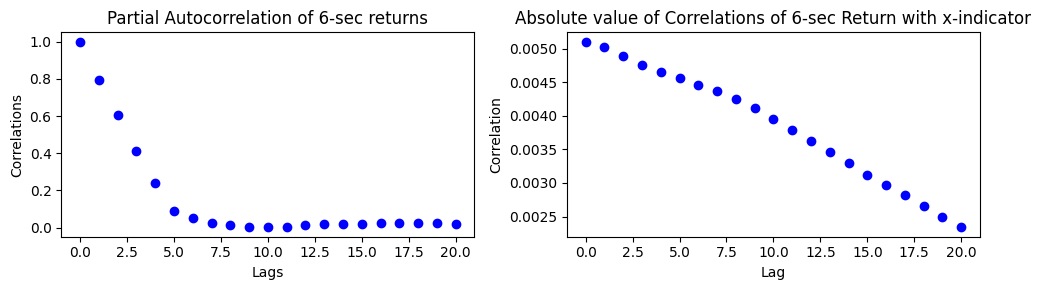

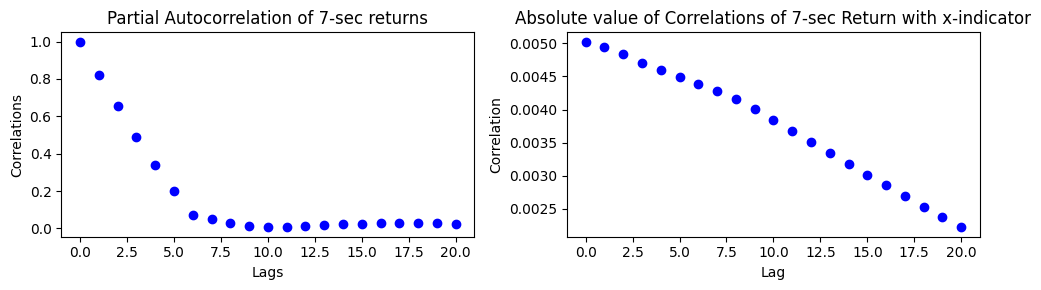

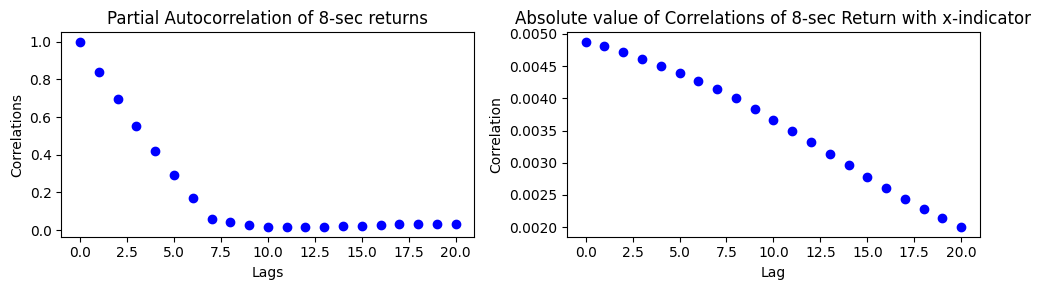

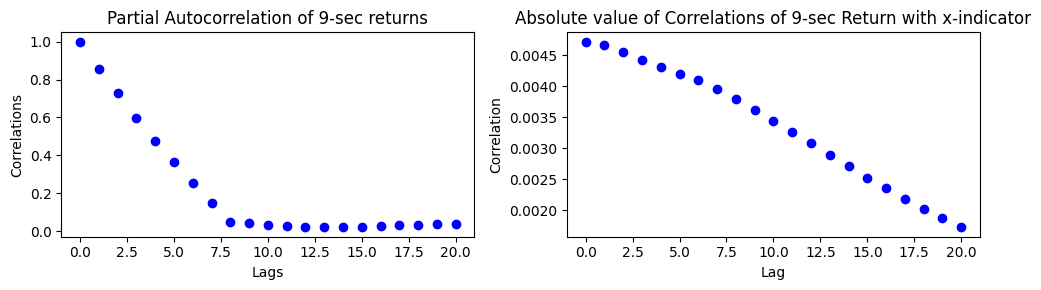

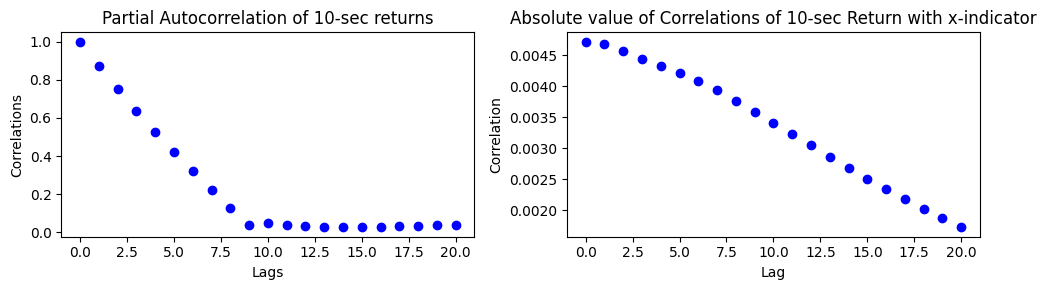

In [237]:

for lookahead in range(1,11):
    data = pd.DataFrame()
    for filepath in dataList:
        currData = pd.read_csv(filepath)
        currData['Day'] = getday(filepath)
        if len(data)==0:
            data = currData
        else:
            data = pd.concat([data, currData])

    data = data.reset_index(drop = True)

    data['returns'] = (data.price.shift(-lookahead) - data.price)/data.price

    data = data[((data.returns > data.returns.quantile(0.01)) & (data.returns < data.returns.quantile(0.99)))]
    
    fig, axes = plt.subplots(1,2,figsize = (10,3))

    correlations = [data.returns.shift(i).corr(data.returns) for i in range(21)]
    axes[0].scatter(range(0,21),[abs(corr) for corr in correlations], marker = 'o', linestyle = '-', color = 'b')
    axes[0].set_title("Partial Autocorrelation of "+str(lookahead)+"-sec returns")
    axes[0].set_xlabel("Lags")
    axes[0].set_ylabel("Correlations")

    correlations = [data.x.shift(i).corr(data.returns) for i in range(21)]
    axes[1].scatter(range(0,21), [abs(corr) for corr in correlations], marker = 'o', linestyle = '-', color = 'b')
    axes[1].set_title("Absolute value of Correlations of "+str(lookahead)+"-sec Return with x-indicator")
    axes[1].set_xlabel('Lag')
    axes[1].set_ylabel('Correlation')

    plt.tight_layout()
    plt.show()

In [76]:
data = pd.DataFrame()
for filepath in dataList:
    currData = pd.read_csv(filepath)
    currData['Day'] = getday(filepath)
    if len(data)==0:
        data = currData
    else:
        data = pd.concat([data, currData])

data = data.reset_index(drop = True)

data['returns'] = (data.price.shift(-1) - data.price)/data.price
data['Xreturn'] = (data.x.shift(-1) - data.x)/data.x

data = data[((data.Xreturn > data.Xreturn.quantile(0.02)) & (data.Xreturn < data.Xreturn.quantile(0.98)))]
data = data[((data.returns > data.returns.quantile(0.01)) & (data.returns < data.returns.quantile(0.99)))]

In [275]:
## Clear change in the value of returns based on the range value of indicator, However correlation not enough to make a linear regression model
data['quantile'] = pd.qcut(data.x, q=8, retbins=False,precision=4, duplicates="raise")
data.groupby('quantile')['returns'].mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_28492\1305982108.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('quantile')['returns'].mean()


quantile
(-1.0, -0.7338]       2.277403e-07
(-0.7338, -0.5134]    1.004638e-07
(-0.5134, -0.3226]    5.451801e-08
(-0.3226, -0.1392]    2.776653e-08
(-0.1392, 0.04676]   -4.078112e-08
(0.04676, 0.2326]    -1.185795e-07
(0.2326, 0.4573]     -1.853344e-07
(0.4573, 0.9966]     -3.353795e-07
Name: returns, dtype: float64

In [285]:
data['squaredReturn'] = 1e4*data['returns']*data['returns']
volatility = data.groupby('time')['squaredReturn'].mean()

In [286]:
volatility = volatility.rolling(window=5).mean()

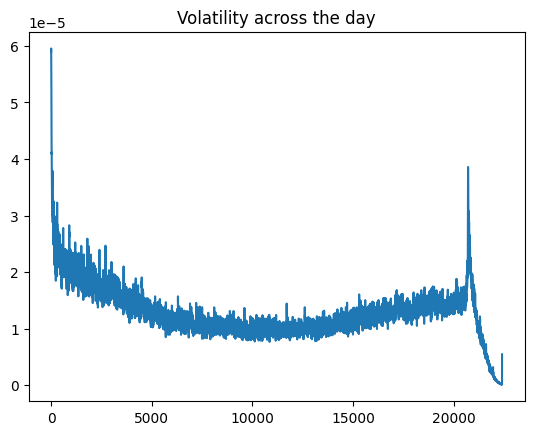

In [288]:
plt.plot(volatility)
plt.title("Volatility across the day")
plt.show()

In [34]:
data = pd.DataFrame()
for filepath in dataList:
    currData = pd.read_csv(filepath)
    currData['Day'] = getday(filepath)
    if len(data)==0:
        data = currData
    else:
        data = pd.concat([data, currData])

data = data.reset_index(drop = True)
data['returns'] = (data.price.shift(-1) - data.price)/data.price
data

,time,price,x,Day,returns
0,1,60385.500000,-0.973460,1,-0.000207
1,2,60373.000000,-0.977009,1,-0.000066
2,3,60369.000000,-0.950026,1,0.000138
3,4,60377.333333,-0.972241,1,-0.000133
4,5,60369.333333,-0.972535,1,-0.000019
...,...,...,...,...,...
4838179,22395,69387.166667,-0.297128,216,0.000010
4838180,22396,69387.833333,-0.295621,216,-0.000005
4838181,22397,69387.500000,-0.296444,216,-0.000002
4838182,22398,69387.333333,-0.295506,216,0.000010


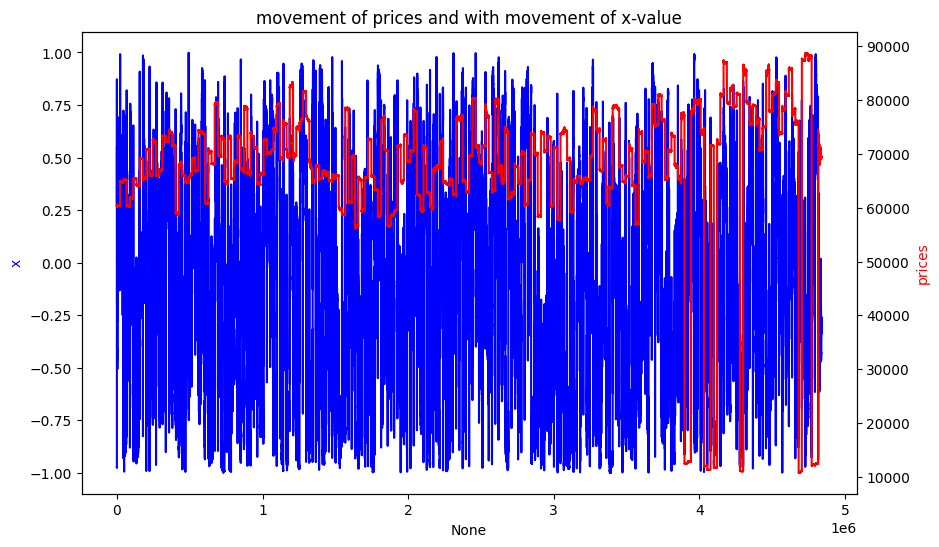

In [35]:
fig, ax1 = plt.subplots(figsize = (10,6))
sns.lineplot(data,x=data.index,y='x',color="blue",ax=ax1)
ax1.set_ylabel("x",color="blue")

ax2 = ax1.twinx()
sns.lineplot(data,x=data.index,y="price",color="red",ax=ax2)
ax2.set_ylabel("prices",color="red")

plt.title("movement of prices and with movement of x-value")
plt.show()

In [ ]:
## Seeing this graph it can be said that 'x' is some sort of price and not a indicator of returns

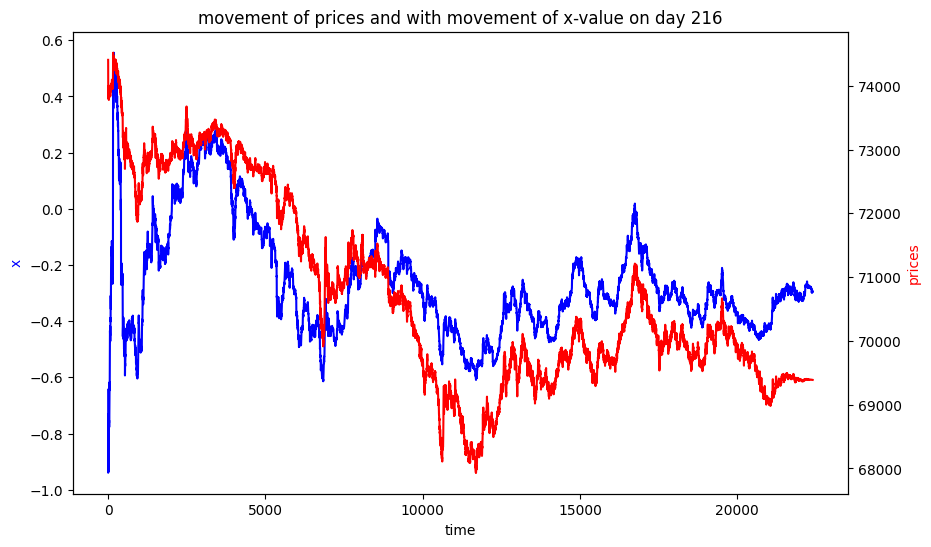

In [31]:
dayToPlot = 216
fig, ax1 = plt.subplots(figsize = (10,6))
sns.lineplot(data[data.Day==dayToPlot],x='time',y='x',color="blue",ax=ax1)
ax1.set_ylabel("x",color="blue")

ax2 = ax1.twinx()
sns.lineplot(data[data.Day==dayToPlot],x="time",y="price",color="red",ax=ax2)
ax2.set_ylabel("prices",color="red")

plt.title("movement of prices and with movement of x-value on day "+str(dayToPlot))
plt.show()

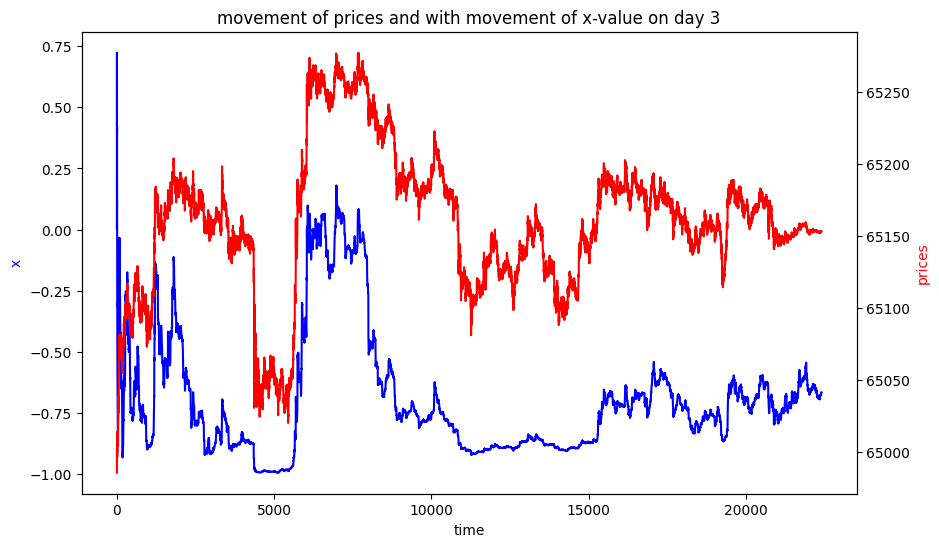

In [36]:
dayToPlot = 3
fig, ax1 = plt.subplots(figsize = (10,6))
sns.lineplot(data[data.Day==dayToPlot],x='time',y='x',color="blue",ax=ax1)
ax1.set_ylabel("x",color="blue")

ax2 = ax1.twinx()
sns.lineplot(data[data.Day==dayToPlot],x="time",y="price",color="red",ax=ax2)
ax2.set_ylabel("prices",color="red")

plt.title("movement of prices and with movement of x-value on day "+str(dayToPlot))
plt.show()

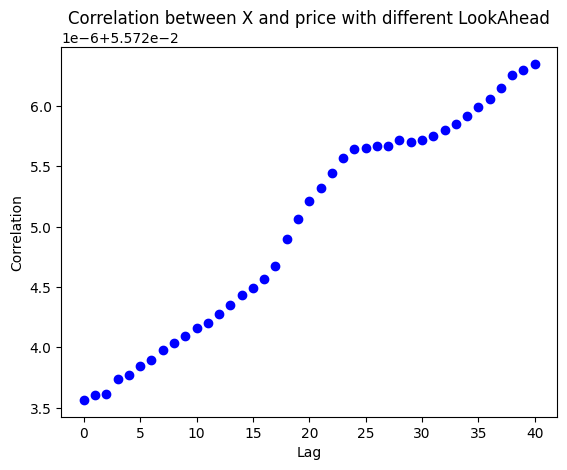

In [117]:
## The correlation between price and X is around 5% which is workable to build a linear regression model using it
correlations = [data.x.shift(i).corr(data.price) for i in range(41)]

plt.scatter(range(41), [abs(corr) for corr in correlations], marker = 'o', linestyle = '-', color = 'b')
plt.title("Correlation between X and price with different LookAhead")
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

In [124]:
data.dropna(inplace=True)
X = sm.add_constant(data['x'])
Y = data[['price']]

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3)

model = sm.OLS(y_train, X_train)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     9825.
Date:                Sun, 10 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:11:30   Log-Likelihood:            -3.4783e+07
No. Observations:             3186230   AIC:                         6.957e+07
Df Residuals:                 3186228   BIC:                         6.957e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.806e+04      7.759   8771.540      0.0

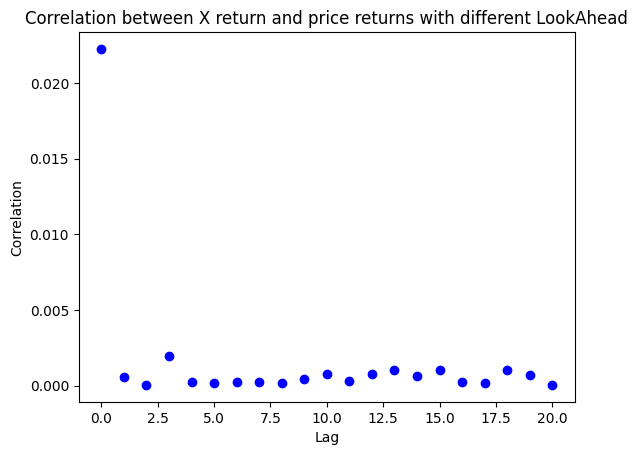

In [125]:
## Very small correlation between return of X and return of price
correlations = [data.Xreturn.shift(i).corr(data.returns) for i in range(21)]

plt.scatter(range(21), [abs(corr) for corr in correlations], marker = 'o', linestyle = '-', color = 'b')
plt.title("Correlation between X return and price returns with different LookAhead")
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

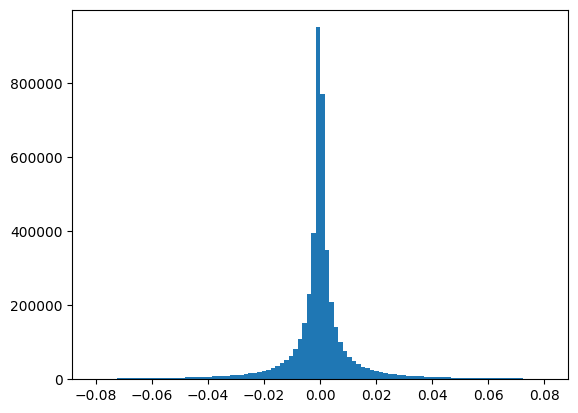

In [63]:
plt.hist(data.Xreturn,bins=100)
plt.show()

In [127]:
## cutoff on returns
lowerCutoff = data.returns.mean() - data.returns.std();
upperCutoff = data.returns.mean() + data.returns.std()

In [128]:
data = data[(data.returns < lowerCutoff) | (data.returns > upperCutoff)]
data

,time,price,x,Day,returns,Xreturn
0,2,60373.000000,-0.977009,1,-0.000066,-0.027618
5,28,60366.000000,0.511229,1,0.000044,0.079882
6,29,60368.666667,0.552067,1,-0.000036,-0.069415
11,36,60365.500000,0.680478,1,0.000110,0.025292
13,38,60374.166667,0.713602,1,0.000110,0.031088
...,...,...,...,...,...,...
4551555,22196,69397.166667,-0.275112,216,0.000036,-0.004535
4551595,22236,69386.833333,-0.279944,216,0.000038,-0.013663
4551603,22244,69388.333333,-0.280483,216,0.000046,-0.019632
4551607,22248,69390.833333,-0.275929,216,-0.000038,0.019316


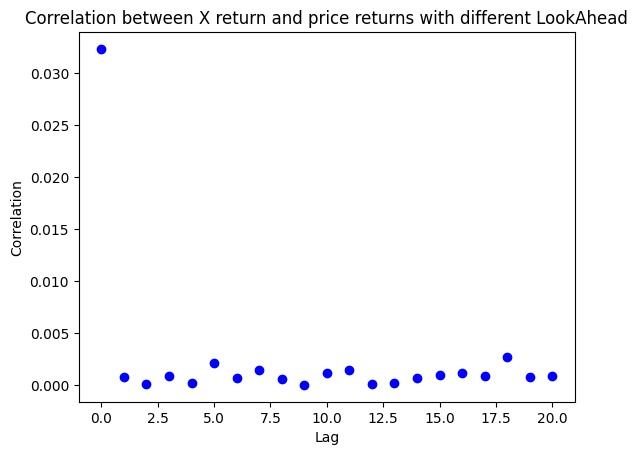

In [129]:
## Trying to the same correlation check but after filtering return for only large values
## But still very small correlations
correlations = [data.Xreturn.shift(i).corr(data.returns) for i in range(21)]

plt.scatter(range(21), [abs(corr) for corr in correlations], marker = 'o', linestyle = '-', color = 'b')
plt.title("Correlation between X return and price returns with different LookAhead")
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

In [86]:
## Decided to build a Linear Regression model using x as indicator for prices with look ahead period of 1
data = pd.DataFrame()
for filepath in dataList:
    currData = pd.read_csv(filepath)
    currData['Day'] = getday(filepath)
    if len(data)==0:
        data = currData
    else:
        data = pd.concat([data, currData])

data = data.reset_index(drop = True)

data['returns'] = (data.price.shift(-1) - data.price)/data.price
data['Xreturn'] = (data.x.shift(-1) - data.x)/data.x

data = data[((data.Xreturn > data.Xreturn.quantile(0.02)) & (data.Xreturn < data.Xreturn.quantile(0.98)))]
data = data[((data.returns > data.returns.quantile(0.01)) & (data.returns < data.returns.quantile(0.99)))]